## Week-2: Create a simple linear classifier using pure tensorflow

### Problem Definition: Use a linear regression model to classify images from MNIST

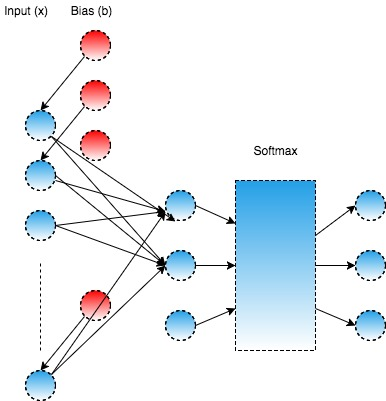

### Get the input data (only the first 'n' labels) from MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('MNIST', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels

In [2]:
# set the number of labels we will be using
n_labels = 3

In [3]:
train_features, train_labels = mnist_features_labels(n_labels)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [76]:
len(train_features)

3118

In [5]:
len(train_labels)

3118

In [78]:
type(train_features[0])

numpy.ndarray

In [79]:
train_features[1].shape

(784,)

In [80]:
print(train_features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [66]:
# set the number of features that will be input to the net
n_features = 784

In [67]:
n_hidden = 100

### Tensorflow Variables.

Last week we learned about 'Constants' and 'placeholders' in tensorflows. Remember that constants cannot change in tensorflow, while placeholders are dummy variables, which can be input during a session.run() call. Tensorflow variables, additionally, are a critical piece of the tensorflow library. They are used for weights and biases which need to be updated internally while learning a model.

In [83]:
weights_hidden = tf.Variable(tf.random_normal([n_features, n_hidden], stddev=1), name="weights_hidden")

In [84]:
weights_out = tf.Variable(tf.random_normal([n_hidden, n_labels], stddev=1), name="weights_out")

In [85]:
biases_hidden = tf.Variable(tf.random_normal([n_hidden], stddev=1), name="biases_hidden")

In [86]:
biases_out = tf.Variable(tf.random_normal([n_labels], stddev=1), name="biases_out")

### Define placeholders for input data

In [87]:
features = tf.placeholder(dtype=tf.float32)
labels = tf.placeholder(dtype=tf.float32)

### Now define the operations that will define the algorithm to pursue.

Evaluate the linear mat-vec product along with addition of a bias term
$$ \hat{x} = x.W + b$$

In [88]:
hidden_inputs = tf.add(tf.matmul(features,weights_hidden),biases_hidden)

In [106]:
prediction_hidden = tf.nn.tanh(hidden_inputs)

In [107]:
hidden_outputs = tf.add(tf.matmul(prediction_hidden,weights_out),biases_out)

Evaluate the logits (called logits by convention)

$$ z_i = \frac{e^{\hat{x_i}}}{\sum_i{e^{\hat{x_i}} }}$$

where i is the output from the i-th neuron in the softmax layer

In [108]:
# Softmax
prediction = tf.nn.softmax(hidden_outputs)

Evaluate the cross_entropy term
$$ \phi_{k} = - { \sum_{i} y_{k,i} . \log{z_{k,i}}} $$

where k=1,2,...N (Number of training samples), and i= i-th output in softmax layer for a sample **k**

In [109]:
# Cross entropy
# This quantifies how far off the predictions were.
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

Evaluate the mean of the entropy term:
$$ \psi = \frac{1}{N} \sum_{k}^{N} \phi_k $$

In [110]:
# Training loss
loss = tf.reduce_mean(cross_entropy)

In [111]:
# Rate at which the weights are changed
learning_rate = 0.0001

# Gradient Descent
# This is the method used to train the model
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### Now run the model under a session

In [112]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(10):
        _ , loss_val = sess.run([optimizer, loss], feed_dict={features: train_features, labels: train_labels})

        print("Loss: ",loss_val)

Loss:  5.52655
Loss:  5.5248
Loss:  5.52304
Loss:  5.52129
Loss:  5.51955
Loss:  5.5178
Loss:  5.51604
Loss:  5.5143
Loss:  5.51255
Loss:  5.51081


## Classroom work:
### Add a hidden layer, with the RELU activation function
### Split train/test data-set, so that we can print 'train' and 'loss' statistics through each iteration (epochs)